In [122]:
import pandas as pd 

In [123]:
df = pd.read_csv('netflix_titles.csv')
print(df.head())
print(df.columns)


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [124]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")

In [30]:
#CLEANING DATA

In [11]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [12]:
df_genres = df['listed_in'].str.split(', ', expand=True).stack()

In [13]:
genre_counts = df_genres.value_counts()
print(genre_counts.head(10))

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt

In [27]:
# Visualize the top 10 genres

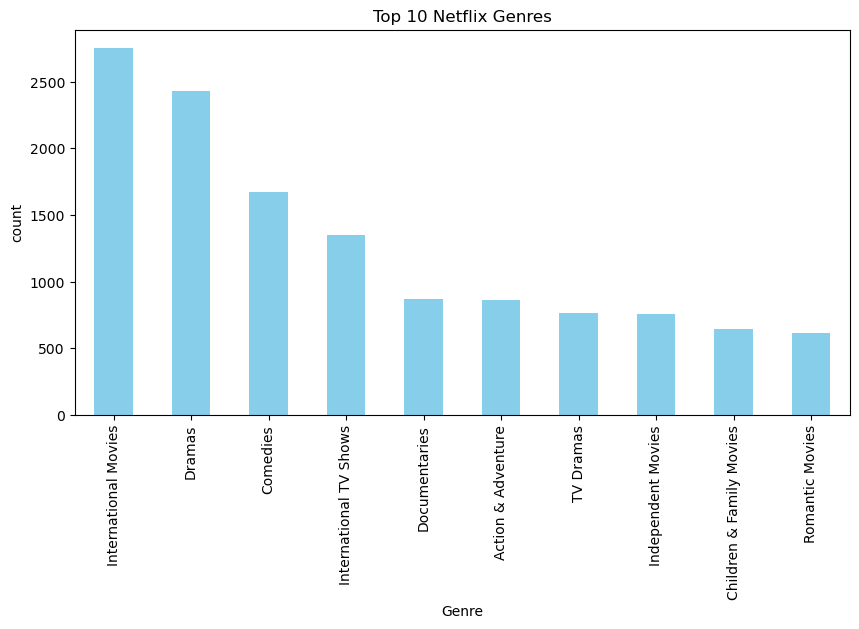

In [59]:
genre_counts.head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()


In [ ]:
#Number of Movies Added Each Year

In [34]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().sort_index()  
print(year_counts)

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


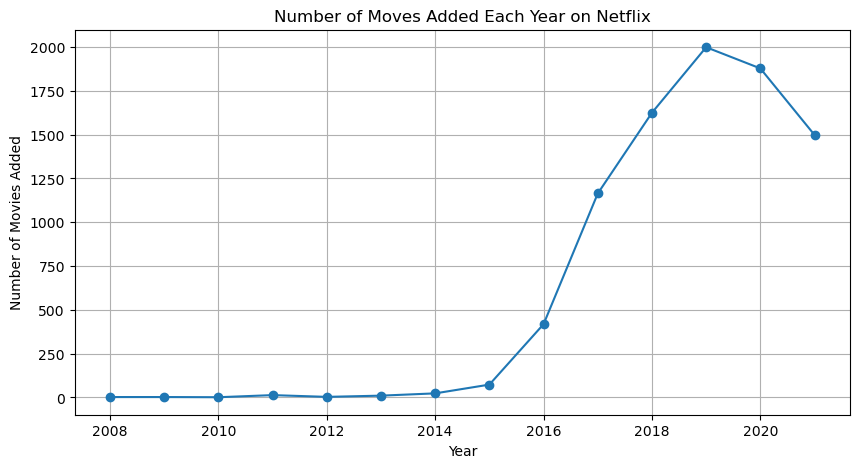

In [37]:
year_counts.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Number of Moves Added Each Year on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Movies Added")      
plt.grid()
plt.show()  

In [61]:
country_avg_year = df.groupby('country')['year_added'].mean().sort_values(ascending=False)
print(country_avg_year.head(10))    

country
United States, United Kingdom, New Zealand    2021.0
Australia, Germany                            2021.0
Argentina, Venezuela                          2021.0
Australia, New Zealand                        2021.0
Belgium, United Kingdom                       2021.0
Belgium, Netherlands                          2021.0
Canada, Hungary, United States                2021.0
Portugal, United States                       2021.0
Philippines, Singapore, Indonesia             2021.0
Russia, United States                         2021.0
Name: year_added, dtype: float64


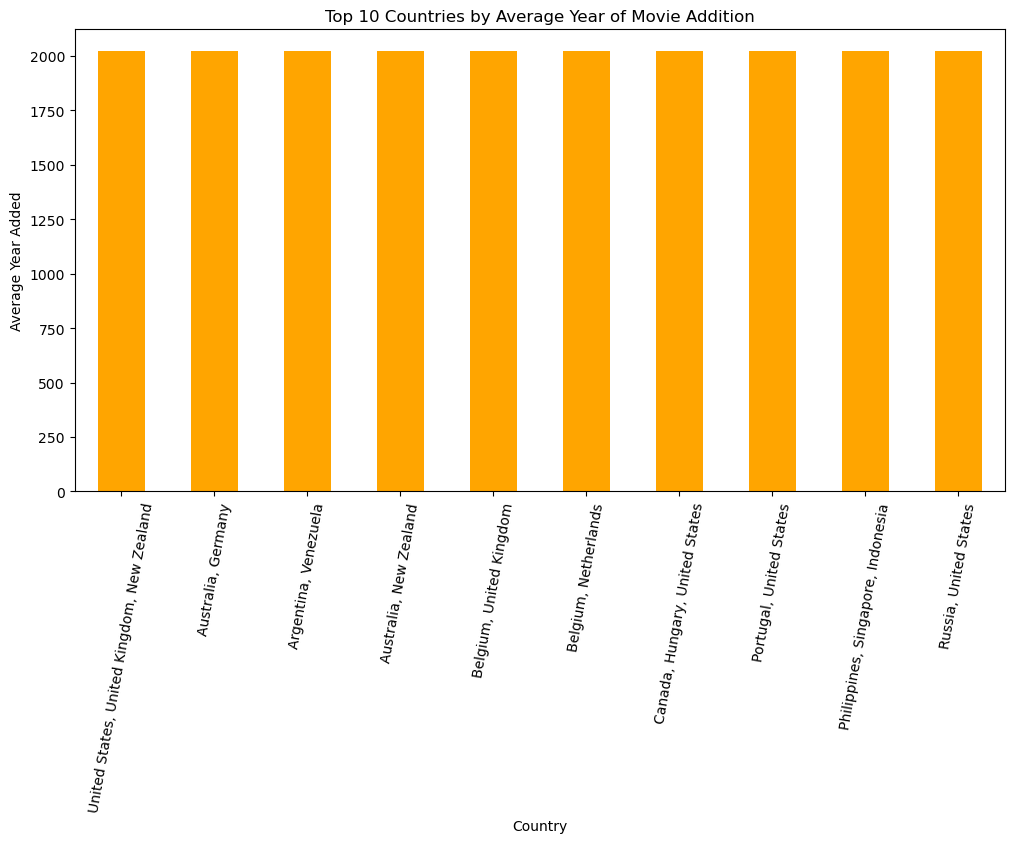

In [63]:
country_avg_year.head(10).plot(kind='bar', figsize=(12,6), color='orange')
plt.title("Top 10 Countries by Average Year of Movie Addition") 
plt.xlabel("Country")   
plt.ylabel("Average Year Added")    
plt.xticks(rotation=80)
plt.show()

In [ ]:

# MOVIES VS TV SHOWS

In [ ]:
type_counts = df['type'].value_counts(dropna=False)
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [69]:
type_percent = df['type'].value_counts(normalize=True).mul(100).round(2)
print(type_percent)

type
Movie      69.62
TV Show    30.38
Name: proportion, dtype: float64


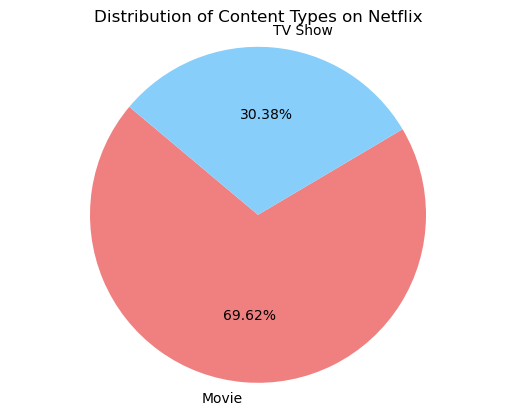

In [72]:
plt.pie(type_percent, labels=type_percent.index,autopct='%.2f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title("Distribution of Content Types on Netflix")
plt.axis('equal')
plt.show()

In [157]:
df['country_list'] = df['country'].str.split(',\s*', regex=True)
countries_exploded = df.explode('country_list')
countries_exploded['country_list'] = countries_exploded['country_list'].str.strip()
countries_clean = countries_exploded[~countries_exploded['country_list'].isin(['Unknown', '', None])]
country_counts = countries_clean['country_list'].value_counts()

print(country_counts.head(20))


country_list
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Indonesia           90
Name: count, dtype: int64


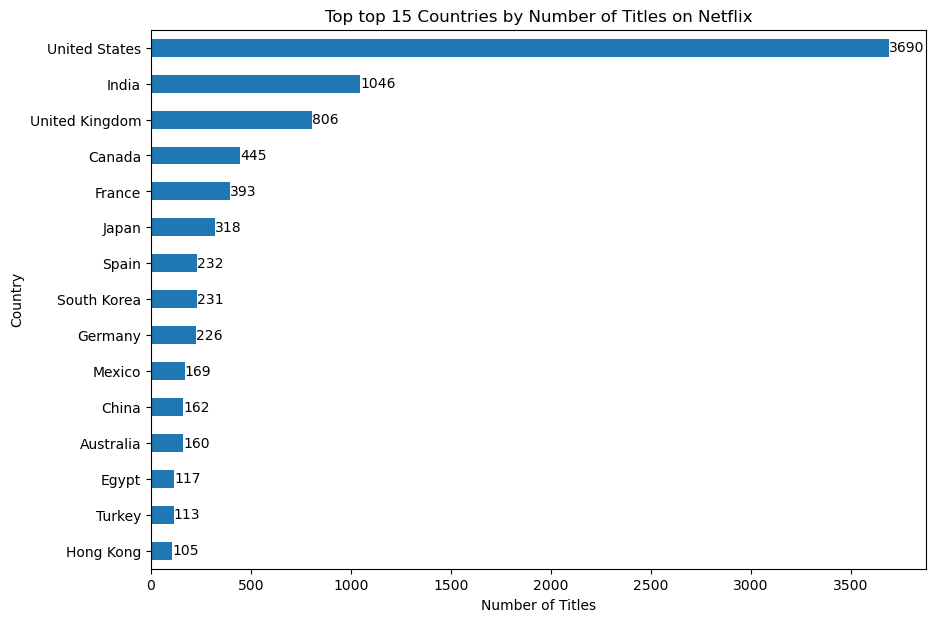

In [170]:
top_c = 15
top_countries = country_counts.sort_values(ascending=True).tail(top_c)
ax = country_counts.head(top_c).sort_values().plot(kind='barh', figsize=(10,7))
ax.set_title("Top top 15 Countries by Number of Titles on Netflix")
ax.set_xlabel("Number of Titles")   
ax.set_ylabel("Country")   
     
for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width() + 0.5, p.get_y() + p.get_height()/2),
                va='center')

plt.show()